**Background**

This code utilises imaginary data from a 'Superstore' which sells various kinds of products (furniture, tech goods, etc) to different customer segments (consumer, corporate, home office).

The data details separate customer orders, including products ordered, profit, discount applied, and customer geography.

**Goals of this Analysis**

In this analysis, we will assume our target audience are the key stakeholders of the business (e.g., owners, operations management).

To help them understand how the business is performing, we will present high level KPI figures (e.g., Profit), and then further break down those figures into different segments (e.g., Profit by Product Sub-Category). This will help guide business decisions around which areas are most and least profitable, and if current strategies need to be re-examined.

### Data Load In

In [704]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pandas import pivot_table

In [705]:
df = pd.read_csv("Sample - Superstore.csv", encoding='windows-1254')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data First Look

In [706]:
df.shape

(9994, 21)

In [707]:
df.describe()
#Value of note: highly negative minimum profit value

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [708]:
df.loc[df['Profit'].idxmin()]
# Large loss due to discounting under cost -- review discount structure and strategy

Row ID                                                7773
Order ID                                    CA-2016-108196
Order Date                                      11/25/2016
Ship Date                                        12/2/2016
Ship Mode                                   Standard Class
Customer ID                                       CS-12505
Customer Name                                Cindy Stewart
Segment                                           Consumer
Country                                      United States
City                                             Lancaster
State                                                 Ohio
Postal Code                                          43130
Region                                                East
Product ID                                 TEC-MA-10000418
Category                                        Technology
Sub-Category                                      Machines
Product Name     Cubify CubeX 3D Printer Double Head Pri

### Data Cleaning

#### Check for null values

In [709]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Remove duplicate rows *(if applicable)*

In [710]:
#Check for duplicates
print(df.duplicated().sum())

0


In [711]:
# Although no duplicates, running drop function for future data updates
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [712]:
# Resulting dataset size
df.shape

(9994, 21)

#### Data Reformatting and Addition of New Useful Columns

In [713]:
# Check data types currently
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Dates are object type; Should convert to datetime

In [714]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

New columns:
1. Margin Ratio (Profit / Sales)
2. Year-Month (YYYY-MM)
3. Month (MM)
4. Year (YYYY)

In [715]:
df['Margin Ratio']=df['Profit']/df['Sales']

df['Year-Month']=df['Order Date'].dt.to_period('M')
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year

In [716]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Margin Ratio,Year-Month,Month,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,2016-11,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,2016-11,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,2016-06,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,2015-10,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,2015-10,10,2015


In [717]:
# Sub-dataframes for current and previous years
current_year = df['Year'].max()
df_current_year = df[df['Year'] == current_year]

previous_year = (df['Year'].max())-1
df_previous_year = df[df['Year'] == previous_year]

### Data Analysis

#### KPIs

##### Yearly KPIs

In [753]:
Year_Revenue = df_current_year['Sales'].sum()
Year_Profit = df_current_year['Profit'].sum()
Year_Profit_Margin = (Year_Profit / Year_Revenue)*100
Year_Order_Count = df_current_year['Order ID'].count()
Year_Discounted_Order_Count = (df_current_year['Discount']>0).sum()

scp = df.groupby(['Sub-Category'])['Profit'].sum().reset_index()
Year_Max_Profitable_Category = scp.loc[scp['Profit'].idxmax()].iloc[0]
Year_Category_Profit = scp.loc[scp['Profit'].idxmax()].iloc[1]

print(f"Current Year: {current_year} \n"
      f"Total Revenue: ${Year_Revenue:,.2f} \n"
      f"Total Profit: ${Year_Profit:,.2f} \n"
      f"Profit Margin: {Year_Profit_Margin:,.2f}% \n"
      f"Total Order Count: {Year_Order_Count} \n \n"
      f"Discounted Order Count: {Year_Discounted_Order_Count} \n"
      f"Most Profitable Category: {Year_Max_Profitable_Category} \n"
      f"Category Profit: ${Year_Category_Profit:,.2f} \n")

Current Year: 2017 
Total Revenue: $733,215.26 
Total Profit: $93,439.27 
Profit Margin: 12.74% 
Total Order Count: 3312 
 
Discounted Order Count: 1722 
Most Profitable Category: Copiers 
Category Profit: $55,617.82 



##### YoY Change

In [755]:
PYear_Revenue = df_previous_year['Sales'].sum()
PYear_Profit = df_previous_year['Profit'].sum()
PYear_Profit_Margin = (PYear_Profit / PYear_Revenue)*100
PYear_Order_Count = df_previous_year['Order ID'].nunique()
PYear_Discounted_Order_Count = (df_previous_year['Discount']>0).sum()

scp = df_previous_year.groupby(['Sub-Category'])['Profit'].sum().reset_index()
PYear_Max_Profitable_Category = scp.loc[scp['Profit'].idxmax()].iloc[0]
PYear_Category_Profit = scp.loc[scp['Profit'].idxmax()].iloc[1]

Revenue_Change = (Year_Revenue - PYear_Revenue)/PYear_Revenue*100
Profit_Change = (Year_Profit - PYear_Profit)/PYear_Profit*100
Profit_Margin_Change = (Year_Profit_Margin - PYear_Profit_Margin)/PYear_Profit_Margin*100
Order_Count_Change = (Year_Order_Count - PYear_Order_Count)/PYear_Order_Count*100
Discounted_Order_Count_Change = (Year_Discounted_Order_Count - PYear_Discounted_Order_Count)/PYear_Discounted_Order_Count*100

print(f"YoY Revenue % Change: {Revenue_Change:,.2f}% \n"
      f"YoY Profit % Change: {Profit_Change:,.2f}% \n"
      f"YoY Profit Margin % Change: {Profit_Margin_Change:,.2f}% \n"
      f"YoY Order Count % Change: {Order_Count_Change:.2f}% \n \n"
      f"YoY Discounted Order Count Change: {Discounted_Order_Count_Change:,.2f}% \n"
      f"Previous Year Most Profitable Category: {PYear_Max_Profitable_Category} \n"
      f"Previous Year Category Profit: ${PYear_Category_Profit:,.2f} \n")

YoY Revenue % Change: 20.36% 
YoY Profit % Change: 14.24% 
YoY Profit Margin % Change: -5.09% 
YoY Order Count % Change: 151.86% 
 
YoY Discounted Order Count Change: 28.60% 
Previous Year Most Profitable Category: Copiers 
Previous Year Category Profit: $17,742.79 



##### Revenue and Profit MoM (All Categories)

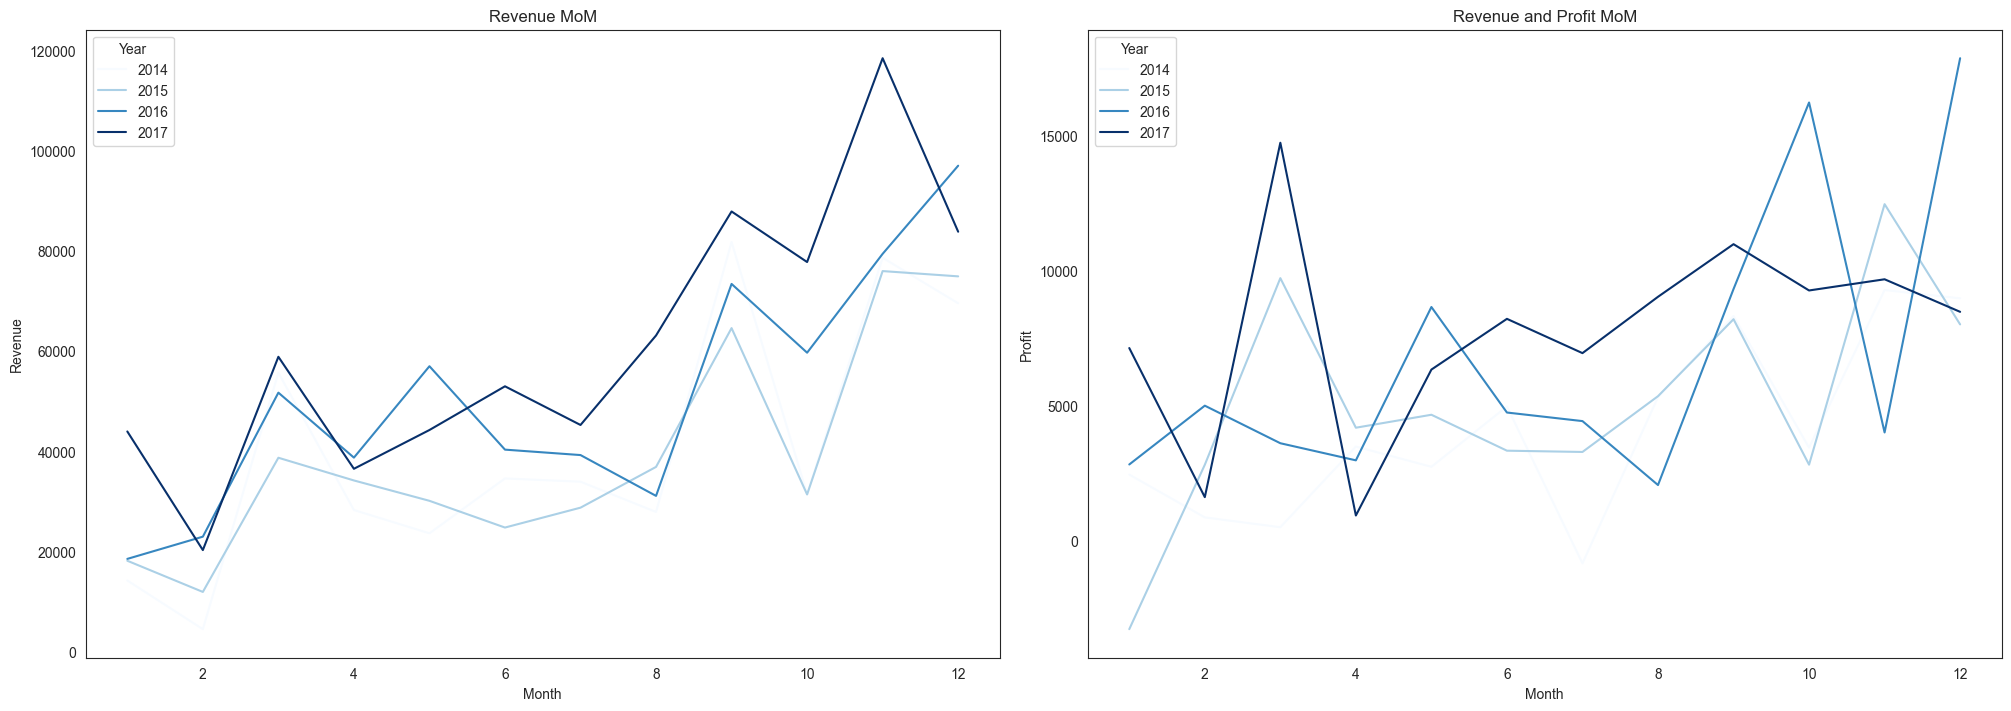

In [762]:
fig, axes = plt.subplots(1,2,figsize=(20,7),constrained_layout=True)

sales_monthly = df.groupby(['Year','Month'])[['Sales','Profit']].sum().reset_index()

axes[0].set_title('Revenue MoM')
axes[0].set_ylabel('Revenue')
sns.lineplot(data=sales_monthly, x='Month', y='Sales', hue='Year', palette='Blues', ax=axes[0])

axes[1].set_title('Profit MoM')
axes[1].set_ylabel('Profit')
sns.lineplot(data=sales_monthly, x='Month', y='Profit', hue='Year', palette='Blues', ax=axes[1])

plt.title('Revenue and Profit MoM')

plt.show()

##### Sales vs Profit by Month

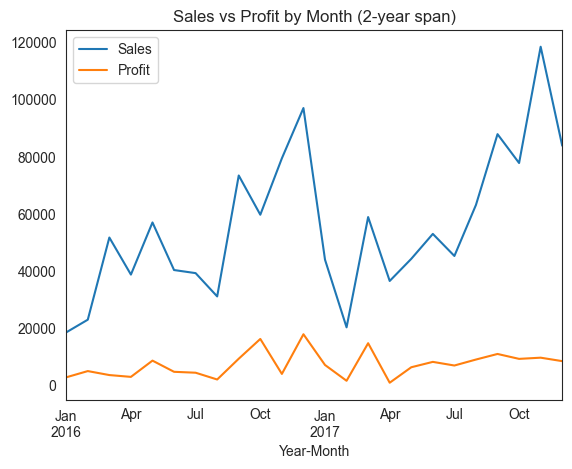

<Figure size 1000x400 with 0 Axes>

In [721]:
monthly = df.groupby('Year-Month')[['Sales','Profit']].sum().sort_values(ascending=False, by='Year-Month').head(24)

monthly.plot(kind='line', title='Sales vs Profit by Month (2-year span)')
plt.figure(figsize = (10,4))
plt.tight_layout()

plt.show()

#### In Detail: Customer Segment

##### Sales, Profit, and Order Quantity by Customer Segment (2017)

In [722]:
Segment_df = df_current_year.groupby(['Segment'])[['Sales','Profit','Quantity']].sum().sort_values(ascending=False, by='Sales')

Segment_df

,Sales,Profit,Quantity
Segment,,,
Consumer,331904.6999,45568.2391,6282
Corporate,241847.8244,26782.3633,3758
Home Office,159462.7309,21088.6672,2436


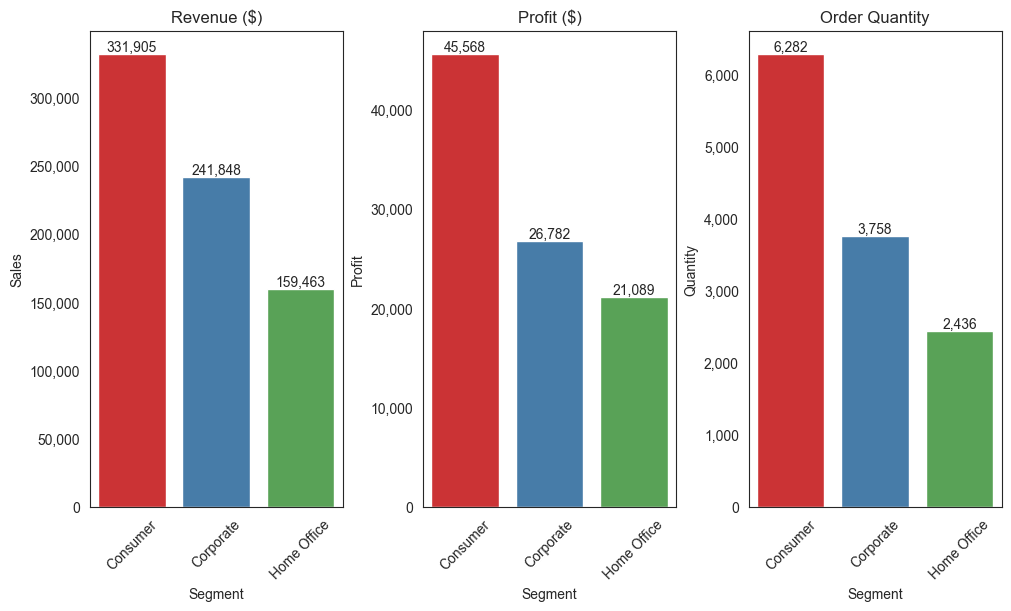

In [723]:
fig, axes = plt.subplots(1,3, figsize=(10,6), constrained_layout=True)

sns.barplot(data=Segment_df, x=Segment_df.index, y='Sales', hue='Segment', palette='Set1', ax=axes[0])
sns.barplot(data=Segment_df, x=Segment_df.index, y='Profit', hue='Segment', palette='Set1', ax=axes[1])
sns.barplot(data=Segment_df, x=Segment_df.index, y='Quantity', hue='Segment', palette='Set1', ax=axes[2])

axes[0].set_title('Revenue ($)')
axes[1].set_title('Profit ($)')
axes[2].set_title('Order Quantity')

for ax in axes:
    ax.tick_params(axis='x', labelrotation=45)

for ax in axes:
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for ax in axes:
    for container in ax.containers:
        if len(container) > 0:
            ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=10)

plt.show()

##### Product Sub-Category Profitability by Customer Segment (2017)

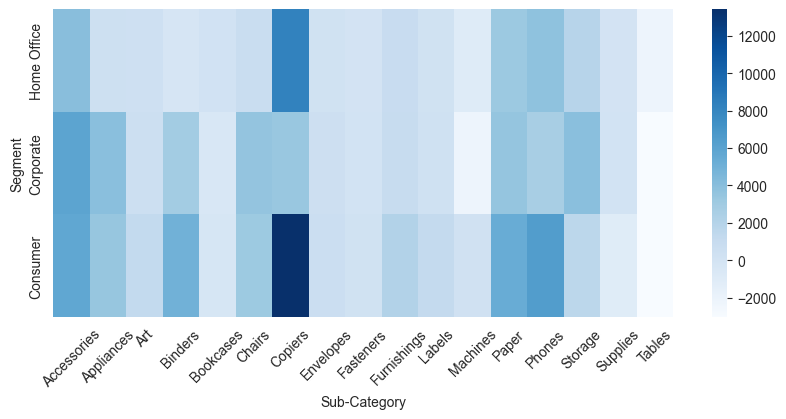

In [724]:
Segment_Cat_Profits = pd.pivot_table(df_current_year, index='Segment', columns='Sub-Category', values='Profit', aggfunc='sum')
Segment_Cat_Profits = Segment_Cat_Profits.sort_index(ascending=False)

plt.figure(figsize = (10,4))
sns.heatmap(Segment_Cat_Profits, cmap='Blues')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

#### In Detail: Product Sub-Category

##### Revenue and Profit by Product Sub-Category (2017)

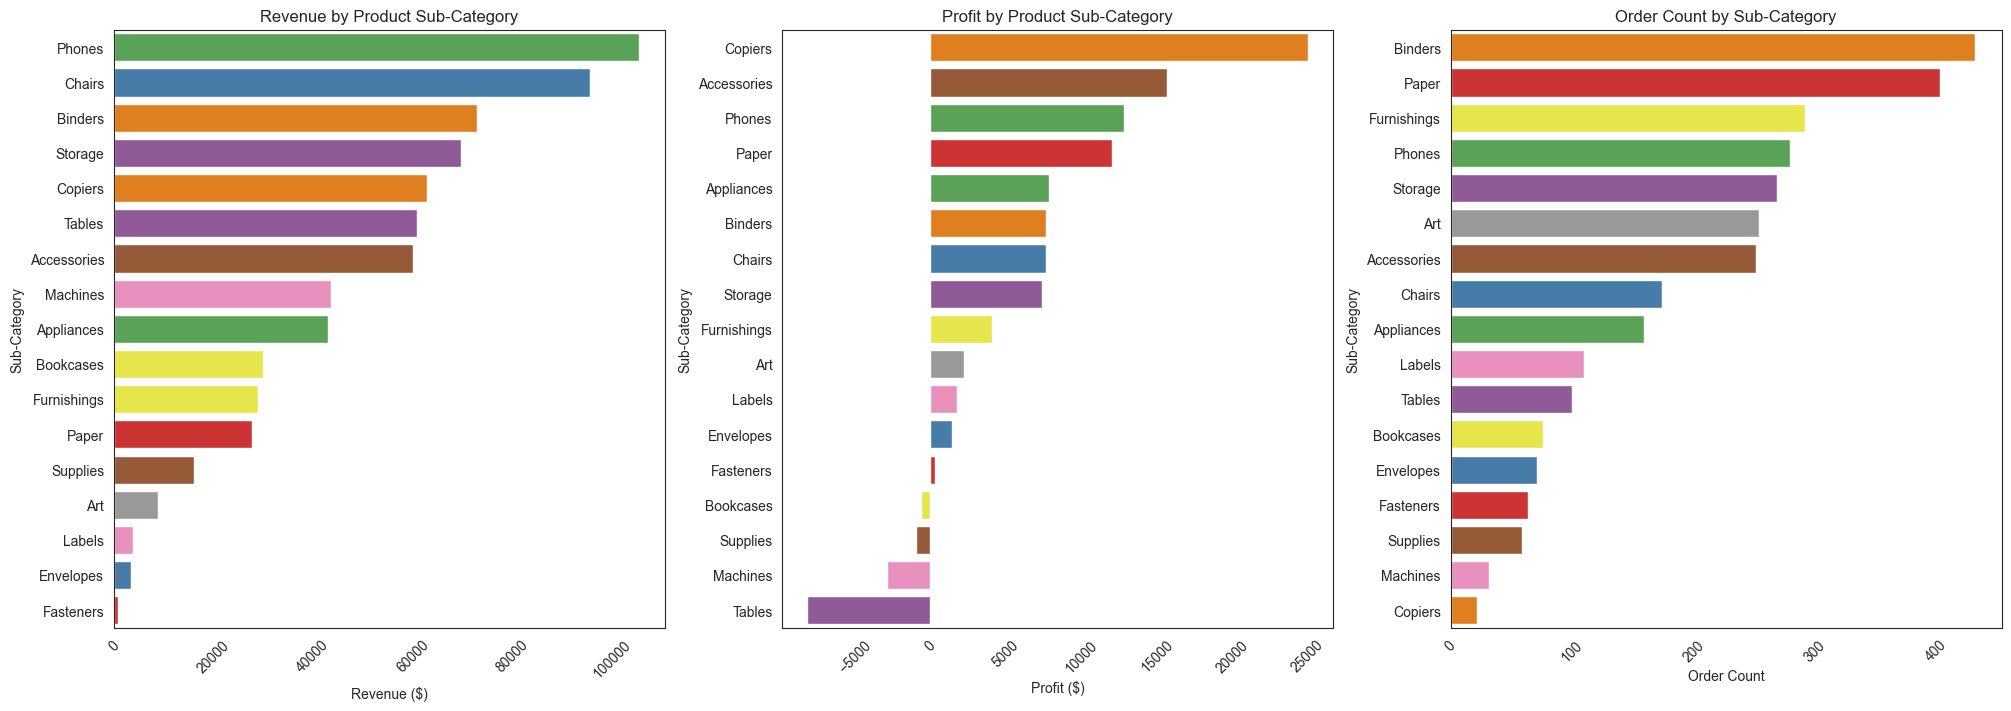

In [725]:
fig, axes = plt.subplots(1,3,figsize=(20,7),constrained_layout=True)
hue_order = df_current_year['Sub-Category'].unique()

category_sales = df_current_year.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()

sns.barplot(data=category_sales, y='Sub-Category', x='Sales', ax=axes[0], hue='Sub-Category', hue_order=hue_order, palette='Set1')
axes[0].set_title('Revenue by Product Sub-Category')
axes[0].set_xlabel('Revenue ($)')


category_profit = df_current_year.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum().sort_values(by='Profit', ascending=False).reset_index()

sns.barplot(data=category_profit, y='Sub-Category', x='Profit', ax=axes[1], hue='Sub-Category', hue_order=hue_order, palette='Set1')
axes[1].set_title('Profit by Product Sub-Category')
axes[1].set_xlabel('Profit ($)')

category_orders = df_current_year.groupby(['Category','Sub-Category'])['Order ID'].nunique().reset_index()

category_orders = category_orders.sort_values(by='Order ID', ascending=False)
sns.barplot(data=category_orders, x='Order ID', y='Sub-Category', ax=axes[2], hue='Sub-Category', hue_order=hue_order, palette='Set1')
axes[2].set_title('Order Count by Sub-Category')
axes[2].set_xlabel('Order Count')

for ax in axes:
    ax.tick_params(axis='x', rotation=45, labelsize=10)

plt.show()

##### Sub-Category Revenue vs Profit (2017)

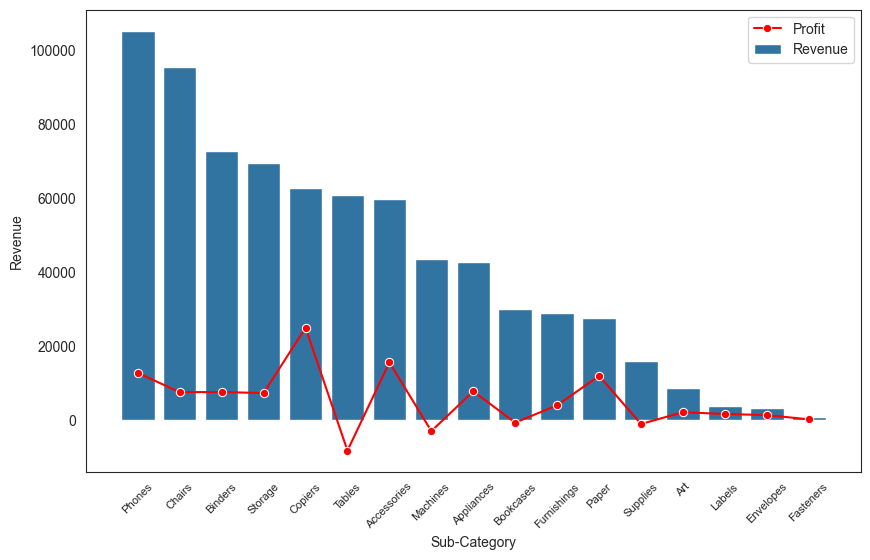

In [726]:
# Using same y axes; note that negative values get clipped
plt.figure(figsize=(10,6))
ax = plt.gca()

#Revenue
sns.barplot(data=category_sales, x='Sub-Category', y='Sales', ax=ax, label='Revenue')

#Profit
sns.lineplot(data=category_sales, x='Sub-Category', y='Profit', color='red', marker='o', ax=ax, label='Profit')

ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.set_ylabel('Revenue')

plt.show()

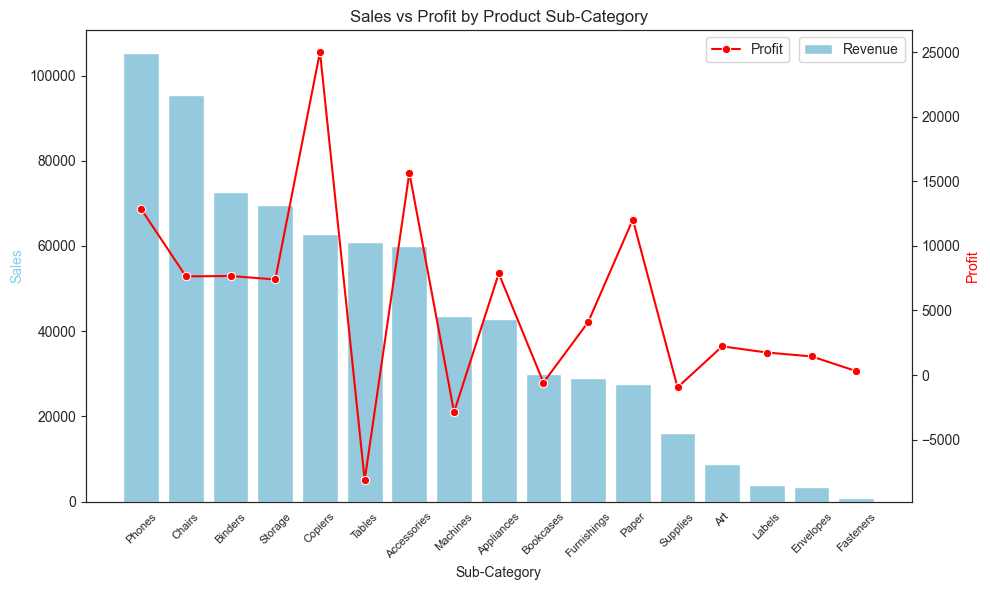

In [727]:
# Using different y axes
plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x='Sub-Category', y='Sales', color='skyblue', label='Revenue')

ax1 = plt.gca()
ax2 = ax1.twinx()

sns.lineplot(data=category_sales, x='Sub-Category', y='Profit', color='red', marker='o', label='Profit', ax=ax2)

# Formatting
ax1.set_ylabel('Sales', color='skyblue')
ax2.set_ylabel('Profit', color='red')
plt.title('Sales vs Profit by Product Sub-Category')
plt.legend(bbox_to_anchor=(0.86, 1.0))
ax1.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

#### In Detail: Region

##### Sales, Profit, and Order Quantity by Region (2017)

In [733]:
Region_df = df_current_year.groupby(['Region'])[['Sales','Profit','Quantity']].sum().sort_values(ascending=False, by='Sales')

Region_df

,Sales,Profit,Quantity
Region,,,
West,250128.3655,43808.9561,4270
East,213082.9040,33230.5614,3411
Central,147098.1282,7550.8442,2880
South,122905.8575,8848.9079,1915


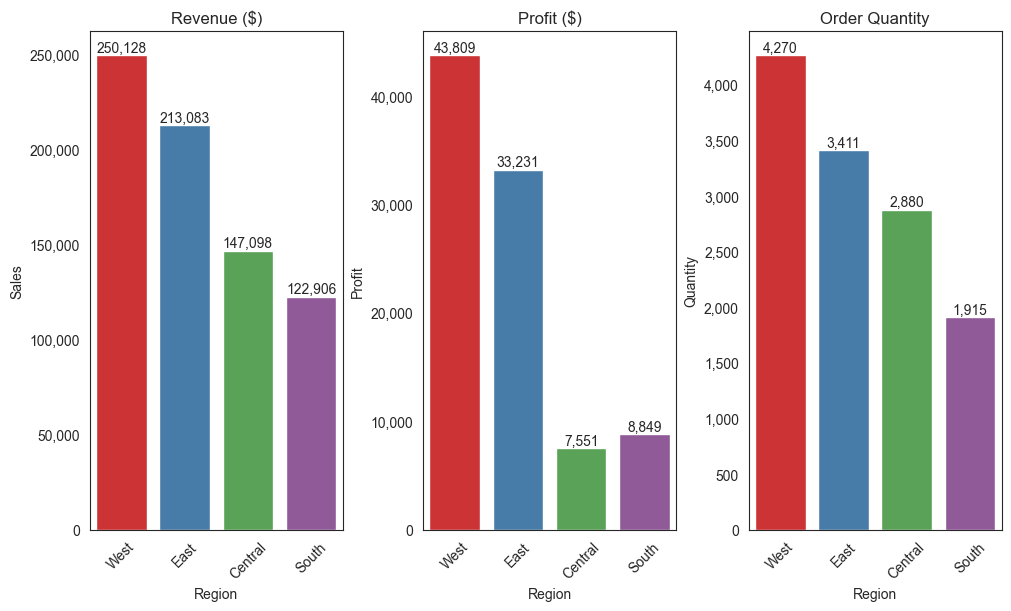

In [734]:
fig, axes = plt.subplots(1,3, figsize=(10,6), constrained_layout=True)

sns.barplot(data=Region_df, x=Region_df.index, y='Sales', hue='Region', palette='Set1', ax=axes[0])
sns.barplot(data=Region_df, x=Region_df.index, y='Profit', hue='Region', palette='Set1', ax=axes[1])
sns.barplot(data=Region_df, x=Region_df.index, y='Quantity', hue='Region', palette='Set1', ax=axes[2])

axes[0].set_title('Revenue ($)')
axes[1].set_title('Profit ($)')
axes[2].set_title('Order Quantity')

for ax in axes:
    ax.tick_params(axis='x', labelrotation=45)

for ax in axes:
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for ax in axes:
    for container in ax.containers:
        if len(container) > 0:
            ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=10)

plt.show()

##### Profit by Region (2017)

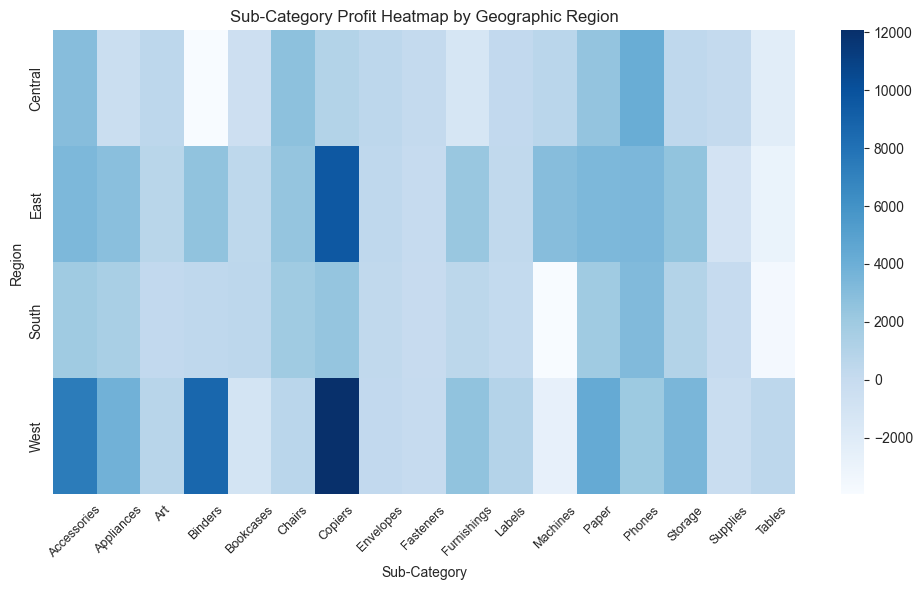

In [728]:
Region_Profit = pd.pivot_table(df_current_year, columns='Sub-Category', index='Region', values='Profit', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(data=Region_Profit,cmap='Blues')

plt.title('Sub-Category Profit Heatmap by Geographic Region')
plt.tick_params(axis='x', rotation=45, labelsize=9)
plt.tight_layout()
plt.show()

##### Order Count by Region (2017)

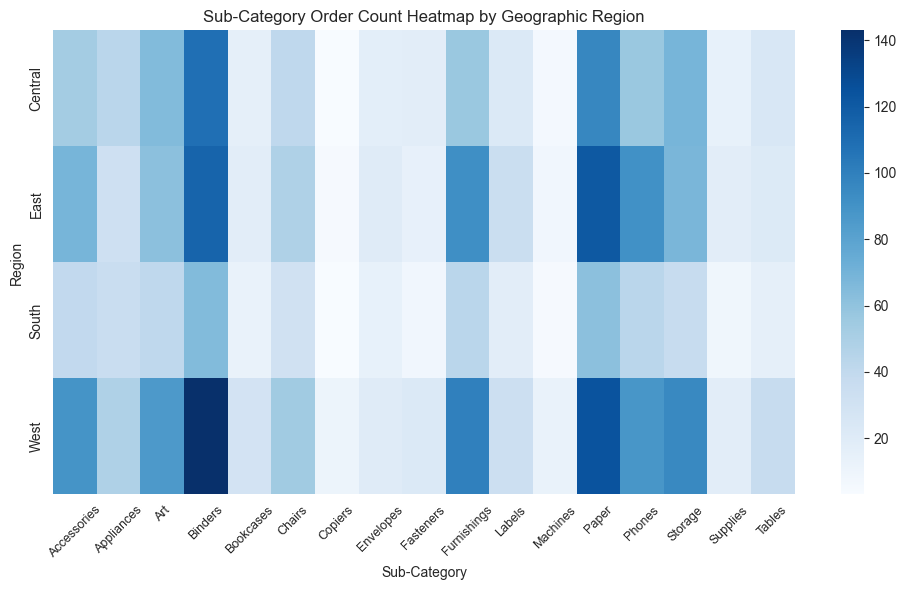

In [729]:
Region_Orders = pd.pivot_table(df_current_year, columns='Sub-Category', index='Region', values='Order ID', aggfunc='nunique')

plt.figure(figsize=(10,6))
sns.heatmap(data=Region_Orders,cmap='Blues')

plt.title('Sub-Category Order Count Heatmap by Geographic Region')
plt.tick_params(axis='x', rotation=45, labelsize=9)
plt.tight_layout()
plt.show()

##### Top 10 Most Profitable States (2017)

In [730]:
State_Sales = df_current_year.groupby(['Region','State'])[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).reset_index()

State_Sales.head(10)

,Region,State,Sales,Profit
0,West,California,146388.3445,29366.4589
1,East,New York,93922.9950,24357.0717
2,West,Washington,65539.8960,17256.7798
3,Central,Michigan,25833.6490,8487.7618
4,South,Georgia,19160.0200,6447.9819
5,East,Delaware,13754.9830,6053.2049
6,Central,Indiana,18516.4500,5139.5257
7,South,Kentucky,15534.8400,4751.7214
8,East,Maryland,9451.6000,2780.6070
9,Central,Minnesota,6728.2500,2459.8789


##### Top 10 Order Quantities by State

In [731]:
State_Order_Count = df_current_year.groupby('State')[['Order ID']].nunique()

State_Order_Count.sort_values(by='Order ID', ascending=False).head(10)

,Order ID
State,
California,344
New York,174
Texas,164
Illinois,100
Pennsylvania,99
Washington,96
Ohio,86
Florida,70
North Carolina,48


###### Deep Dive: Which Products are the Top 10 Profit States buying?

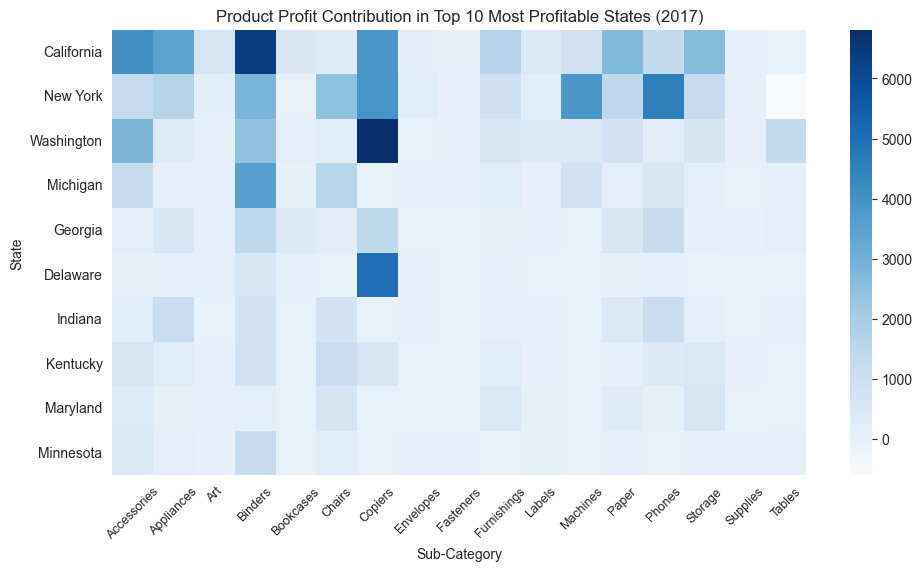

In [732]:
Top_Profit_States = State_Sales.State.head(10).to_list()

Top_Profit_State_Subcats = pd.pivot_table(df_current_year[df_current_year['State'].isin(Top_Profit_States)], index='State', columns='Sub-Category', values='Profit', aggfunc='sum')

#Replace null values (no sales) with 0
Top_Profit_State_Subcats.fillna(0, inplace=True)

#Ensure df states are in order of profit for heatmap
Top_Profit_State_Subcats = Top_Profit_State_Subcats.reindex(Top_Profit_States)

plt.figure(figsize=(10,6))
sns.heatmap(Top_Profit_State_Subcats, cmap='Blues')
plt.title('Product Profit Contribution in Top 10 Most Profitable States (2017)')
plt.tight_layout()
plt.tick_params(axis='x', rotation=45, labelsize=9)
plt.show()

Possible further analyses
1. Which items are typically discounted? Which tend to result in a loss? (loss leaders?)
2. Are there certain products that are only purchased when discounted? Which products see the least and the most price elasticity? (do we want to conduct A/B price testing, or test features that increase value perception?)
3. Which products tend to have repeat customers (Offer a subscription)
4. Which products tend to be purchased together (Offer a bundle deal)
5. Order to ship dates for various ship modes